# INCOME QUALIFICATION
Identify the level of income qualification needed for the families in Latin America.

- Id: Each individual has a different ID.
- idhogar: This is the household identifier. Each household has a unique ID.
- parentesco1: This variable will have value 1 if the individual is the head of the household and 0 otherwise.
- Target: This variable tells us the level of poverty of each individual :
    - 1 = extreme poverty 
    - 2 = moderate poverty 
    - 3 = vulnerable households 
    - 4 = non vulnerable households

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [178]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [179]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [181]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [182]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Investigating columns with dtype Object

In [184]:
train.select_dtypes(include=['object']).columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [185]:
train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [186]:
train['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [187]:
train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
3.5            18
.80000001      18
1.25           18
2.25           13
.71428573      12
1.75           11
.83333331      11
.22222222      11
1.2            11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

- dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

According to the above explainations, we will replace 'yes' with 1 and 'no' with 0

In [188]:
train['dependency'] = train['dependency'].replace({'yes':1 ,'no':0})
train['edjefe'] = train['edjefe'].replace({'yes':1 ,'no':0})
train['edjefa'] = train['edjefa'].replace({'yes':1 ,'no':0})

test['dependency'] = test['dependency'].replace({'yes':1 ,'no':0})
test['edjefe'] = test['edjefe'].replace({'yes':1 ,'no':0})
test['edjefa'] = test['edjefa'].replace({'yes':1 ,'no':0})

In [189]:
train['dependency'] = train['dependency'].astype('float64')
train['edjefe'] = train['edjefe'].astype('float64')
train['edjefa'] = train['edjefa'].astype('float64')

### Check for biases in the dataset

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64


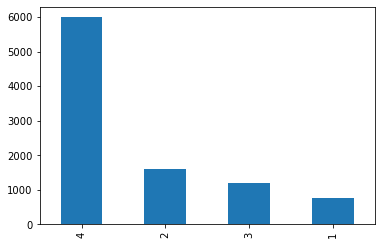

In [190]:
print(train['Target'].value_counts(normalize=True))
train['Target'].value_counts().plot(kind='bar')
plt.show()

Our dataset is unbalanced. We have ~63% of class 4 observations and just 8% of class 1 observations. Thus, class 4 is represented more as compared to other classes

### Check for missing values

In [191]:
missing = {}
for x in train.columns:
    if train[x].count() < 9557:
        missing[x] = round(((9557 - train[x].count())/9557)*100,2)

missing

{'v2a1': 71.78,
 'v18q1': 76.82,
 'rez_esc': 82.95,
 'meaneduc': 0.05,
 'SQBmeaned': 0.05}

We see that 3 columns have more than 70% of data missing and hence should be investigated further. For the other two columns, since only 0.5% of the data is missing, it is not an issue and we can probably impute the missing values with mean.

##### v2a1 : Monthly rent payment.
We will check the tipovivi status of the missing values which indicates whether the house is owned, rented, borrowed etc.

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64


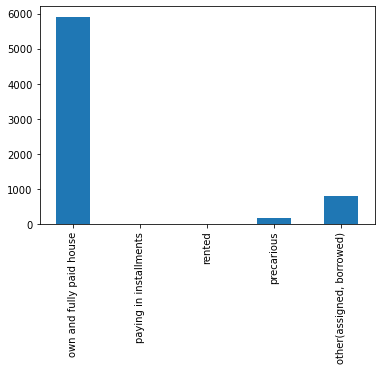

In [192]:
print(train.loc[(train['v2a1'].isnull() == True), ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].sum())
train.loc[(train['v2a1'].isnull() == True), ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].sum().plot(kind='bar')
plt.xticks(ticks= [0,1,2,3,4], labels=['own and fully paid house', 'paying in installments', 'rented', 'precarious', 'other(assigned, borrowed)'])
plt.show()

Majority of the houses are fully paid and hence there will be no monthly rent payment. So for these houses, we will replace NaN with 0. For the other two categories, we will impute them

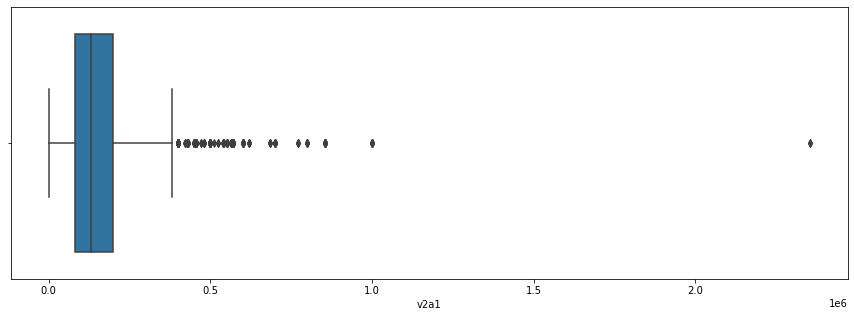

In [193]:
fig, ax= plt.subplots(figsize=(15, 5))
sns.boxplot(data=train, x='v2a1', ax=ax)

Since there are outliers, we will not impute missing values with mean. Instead, we will use median

In [194]:
med = train['v2a1'].median()
train.loc[(train['tipovivi1'] == 1), 'v2a1'] = 0
train.loc[(train['tipovivi4'] == 1), 'v2a1'] = med
train.loc[(train['tipovivi5'] == 1), 'v2a1'] = med

test.loc[(test['tipovivi1'] == 1), 'v2a1'] = 0
test.loc[(test['tipovivi4'] == 1), 'v2a1'] = med
test.loc[(test['tipovivi5'] == 1), 'v2a1'] = med

##### v18q1: Number of tablets household owns
We will use the v18q column (owns a tablet) to count the total number of tablets owned by each household

In [195]:
train.loc[(train['v18q1'].isnull() == True), 'v18q'].value_counts()

0    7342
Name: v18q, dtype: int64

This means that every family that has a missing value for v18q1 does not own a tablet. So we will replace NaN values with 0

In [196]:
train['v18q1'].fillna(value=0,inplace=True)
test['v18q1'].fillna(value=0,inplace=True)

##### rez_esc: Years behind in school

In [197]:
train['rez_esc'].value_counts()

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [198]:
train['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

Checking if any of the null values correspond to those who have no level of education i.e., instlevel1 = 1

In [199]:
train.loc[(train['rez_esc'].isnull() == True) & (train['instlevel1']==1), 'instlevel1'].sum()

1183

There are 1183 people who have no level of education. Hence, we will set their rez_esc to 0.

Let us check the age range of those for whom rez_esc value is null and not null.

In [200]:
train.loc[train['rez_esc'].isnull() == True, 'age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [201]:
train.loc[train['rez_esc'].isnull() == False, 'age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

On referring other resources, I found out that this variable is defined for all those between the ages 7 and 19 inclusive i.e., for those who are in school. For anyone above or below that age, the rez_esc variable should be replaced with 0. 

In [202]:
train.loc[(train['rez_esc'].isnull() == True) & (train['instlevel1']==1), 'rez_esc'] = 0
train.loc[(train['rez_esc'].isnull() == True) & ((train['age'] < 7) | (train['age'] >19)) , 'rez_esc'] = 0

test.loc[(test['rez_esc'].isnull() == True) & (test['instlevel1']==1), 'rez_esc'] = 0
test.loc[(test['rez_esc'].isnull() == True) & ((test['age'] < 7) | (test['age'] >19)) , 'rez_esc'] = 0

In [203]:
train['rez_esc'].isnull().sum()

346

In [204]:
train.loc[train['rez_esc'].isnull() == True, 'age'].describe()

count    346.000000
mean      18.482659
std        0.500423
min       18.000000
25%       18.000000
50%       18.000000
75%       19.000000
max       19.000000
Name: age, dtype: float64

There are 346 children of ages 18 or 19 for whom we dont have rez_esc information. We will impute these values with mode i.e., 0

In [205]:
train.loc[(train['rez_esc'].isnull() == True) & ((train['age'] == 18) | (train['age'] == 19)) , 'rez_esc'] = 0

test.loc[(test['rez_esc'].isnull() == True) & ((test['age'] == 18) | (test['age'] == 19)) , 'rez_esc'] = 0

In [206]:
train['rez_esc'].isnull().sum()

0

##### meaneduc : average years of education for adults (18+)

First check the ages for which the value is missing because this variable is only meant for adults i.e., 18 and above

In [207]:
train.loc[train['meaneduc'].isnull() == True, 'age']

1291    18
1840    18
1841    18
2049    19
2050    19
Name: age, dtype: int64

In [208]:
idx_missing_train = list(train.index[train['meaneduc'].isnull()])
idx_missing_test = list(test.index[test['meaneduc'].isnull()])

In [209]:
print(list(train['meaneduc'].unique()))

[10.0, 12.0, 11.0, 23.0, 9.5, 17.0, 13.5, 10.333333, 15.0, 6.666666499999999, 5.25, 7.0, 15.5, 9.0, 13.0, 14.0, 16.5, 14.333332999999998, 9.333333, 6.5, 6.0, 8.0, 4.0, 11.5, 12.75, 12.5, 5.5, 7.7777777000000015, 7.5, 4.5, 11.333333, 6.25, 16.0, 19.0, 5.0, 12.25, 5.6666665, 9.666667, 2.0, 10.5, 11.4, 11.75, 13.666667000000002, 2.5, 8.666667, 7.75, 18.0, 14.5, 8.5, 1.0, 6.2857141, 10.25, 3.5, 4.3333335, 8.333333, 14.2, 18.5, 21.0, 4.6666665, 17.5, 9.25, 9.75, 7.666666499999999, 8.6000004, 15.666667000000002, 11.666667, 5.3333335, 6.75, 10.6, 3.0, 20.0, 12.666667, 11.25, 7.25, 6.3333335, 3.6666667, 12.333333, 8.75, 14.666667000000002, 17.333334, 21.5, 0.0, 8.8000002, 10.666667, 13.75, 13.333332999999998, 16.333334, 7.333333500000001, nan, 10.4, 20.5, 7.599999900000001, 15.333332999999998, 4.25, 10.75, 28.0, 17.666666, 13.25, 1.5, 5.75, 8.25, 22.0, 2.3333333, 11.6, 11.2, 29.0, 10.8, 14.75, 8.3999996, 2.6666667, 6.7777777000000015, 25.0, 15.25, 4.5999999, 15.75, 3.3333333, 5.5714288, 2.75, 

We will impute the missing values using the mean.

In [210]:
meaneduc_mean = train['meaneduc'].mean()
train['meaneduc'].fillna(meaneduc_mean, inplace=True)
test['meaneduc'].fillna(meaneduc_mean, inplace=True)

##### SQBmeaned: Square of the mean years of education of adults (>=18) in the household
We will fill the missing values with the square of the corresponding mean values

In [211]:
train['SQBmeaned'].fillna(meaneduc_mean ** 2, inplace=True)
test['SQBmeaned'].fillna(meaneduc_mean ** 2, inplace=True)

In [212]:
train['meaneduc'].isnull().sum()

0

In [213]:
train['SQBmeaned'].isnull().sum()

0

For the next two steps, we will combine the train and test sets for ease of calculation and then seperate them again before model building.

In [214]:
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413 entries, 0 to 33412
Columns: 143 entries, Id to Target
dtypes: float64(9), int64(129), object(5)
memory usage: 36.5+ MB


### Check whether all members of the house have the same poverty level

In [216]:
poverty_level = pd.DataFrame(data.groupby(by=['idhogar'])['Target'].var())
poverty_level.reset_index(inplace=True)
different_poverty_level = poverty_level[poverty_level['Target'] > 0]
different_poverty_level

,idhogar,Target
64,0172ab1d9,0.300000
149,03f4e5f4d,0.333333
183,0511912b6,0.250000
294,078a0b6e2,0.333333
388,09e25d616,0.250000
...,...,...
9243,e65d4b943,0.200000
9646,efd3aec61,0.300000
9655,f006348ed,0.300000
9998,f7b421c2c,0.200000


- There are a total of 85 records wherein the members of the same house do not have the same poverty level

### Check if there is a house without a family head

In [217]:
family_head = pd.DataFrame(pd.pivot_table(data=data, index='idhogar', values='parentesco1', aggfunc=np.sum))
family_head.reset_index(inplace=True)
without_family_head = family_head[family_head['parentesco1'] < 1]
print("Number of houses without a family head: {}".format(len(without_family_head)))
print("\n")
print(without_family_head)

Number of houses without a family head: 33


         idhogar  parentesco1
141    03c6bdf85            0
376    09b195e7a            0
544    0e2a3453d            0
745    1367ab31d            0
1000   198fc274a            0
1078   1bc617b23            0
1824   2dc45d484            0
2195   374ca5a19            0
3623   5a667591a            0
3907   61c10e099            0
4118   676750a21            0
4288   6b1b2405f            0
5547   896fe6d3e            0
5853   91aff0a8e            0
6310   9d874b0d6            0
6432   a0812ef17            0
6933   ad687ad89            0
7083   b115b4536            0
7115   b1f4d89d7            0
7264   b59f5b526            0
7667   bfd5067c2            0
7700   c0c8a5013            0
8252   ce6154327            0
8366   d14b3e03a            0
8458   d363d9183            0
8596   d678c45ad            0
8944   df06e01c6            0
9136   e3f69768c            0
9173   e4df1caaf            0
9767   f2bfa75c4            0
9782   f2fd28dbb         

### Set poverty level of the members and the head of the house within a family

In [218]:
#list of idhogar for all families with unequal poverty level
idhogar_different_poverty_level = different_poverty_level['idhogar'].tolist()

#list of idhogar for all families without a family head
without_family_head_idhogar = without_family_head['idhogar'].tolist()

Checking the number of unique poverty scores for each house without a head. This will tell us whether or not the family members have the same level of poverty. If unique value is 1, all members of the family belong to the same category. 

In [219]:
without_head_unique = []
for z in without_family_head_idhogar:
    without_head_unique.append(len(data[data['idhogar'] == z]['Target'].unique()))

In [220]:
print(without_head_unique)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Checking the number of unique poverty scores for each house with a head 

In [221]:
with_head_unique = []
for z in idhogar_different_poverty_level:
    if z not in without_family_head_idhogar:
        with_head_unique.append(len(data[data['idhogar'] == z]['Target'].unique()))

In [222]:
print(with_head_unique)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Thus, we see that for families without a head, there is just one unique value for the poverty score and hence, we will not have to make any changes to that. For families with a family head, which have different poverty levels, we set the poverty level of all members to be equal to the poverty level of the family head. 

In [223]:
for x in idhogar_different_poverty_level:
    if x not in without_family_head_idhogar:
        i = data.index[(data['idhogar'] == x) & (data['parentesco1'] == 1)][0]
        head_val = data['Target'][i]
        data.loc[(data['idhogar'] == x), 'Target'] = head_val

Split the data into train and test again

In [224]:
train_data = data[:len(train)]
test_data = data[len(train):]

### Remove null value rows of the target variable

In [225]:
train_data['Target'].dropna(inplace=True, axis=0)

C:\Users\ARPITA\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


## Feature Engineering

There are a few variables that need to be removed:
- ID variables: Those that are used to identify an individual or household
- Squared variables: These are just the squared values of existing variables. They are highly correlated and hence, redundant.
- Repeated variables: There are a few variables that have the same function and hence need to be removed.
- Zero variance: Columns that have a variance of zero indicate that they have the same values for all records. 

Id, idhogar, hogar_total, SQBescolari, SQBage, SQBhogar_total, SQBedjefe, SQBhogar_nin, SQBovercrowding, SQBdependency, SQBmeaned, agesq

##### ID Variables : Id and idhogar

In [226]:
train_data.drop(columns=['Id', 'idhogar'], inplace=True, axis=1)
test_data.drop(columns=['Id', 'idhogar'], inplace=True, axis=1)

C:\Users\ARPITA\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##### Squared Variables: SQBescolari, SQBage, SQBhogar_total, SQBedjefe, SQBhogar_nin, SQBovercrowding, SQBdependency, SQBmeaned, agesq

The squared variables are highly correlated with their original variables as shown below

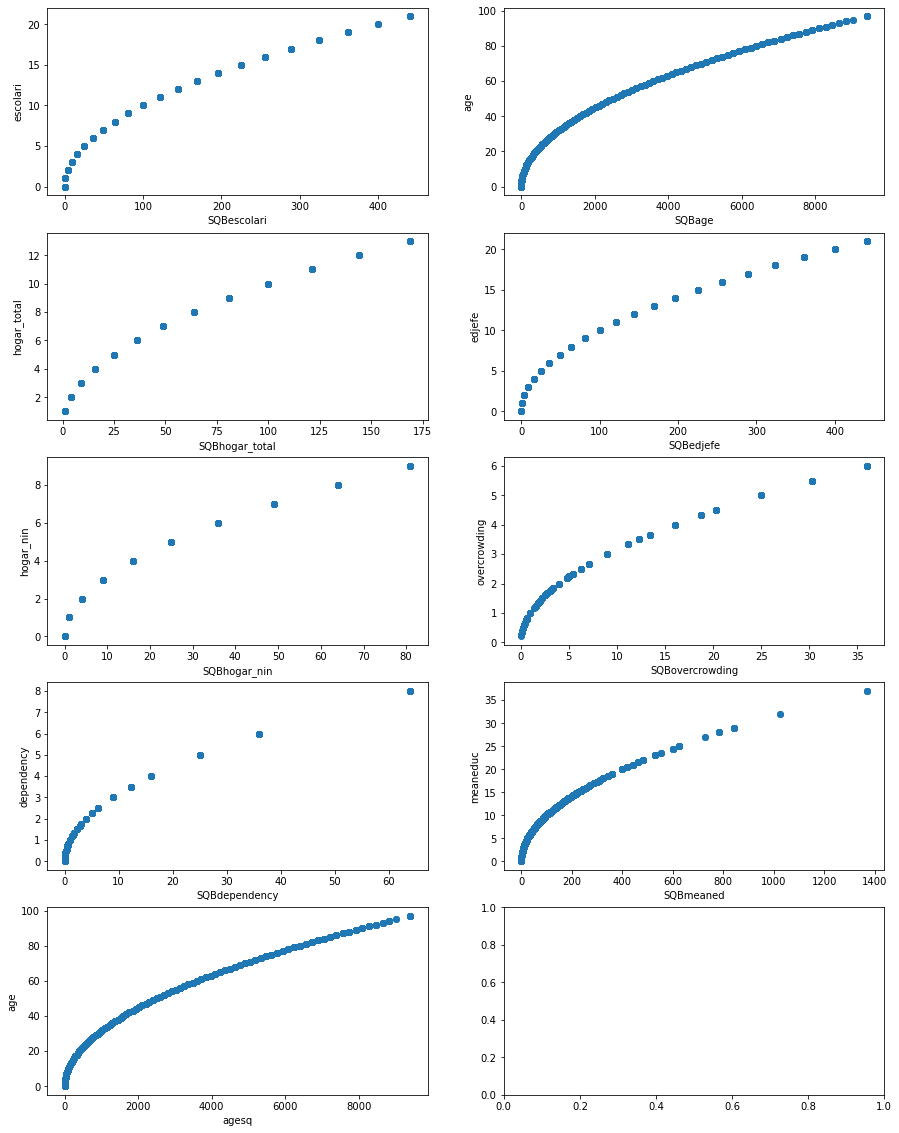

In [227]:
sq_variables = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding',
                'SQBdependency', 'SQBmeaned', 'agesq']
nonsq_variables = ['escolari', 'age', 'hogar_total', 'edjefe', 'hogar_nin', 'overcrowding',
                'dependency', 'meaneduc', 'age']

variables = list(zip(sq_variables, nonsq_variables))

fig,ax = plt.subplots(5,2,figsize=(15,20))
for idx, v in enumerate(variables):
    row,col = idx//2,idx%2
    ax[row,col].scatter(x=train[v[0]], y=train[v[1]])
    ax[row,col].set_xlabel(v[0])
    ax[row,col].set_ylabel(v[1])

plt.show()

In [228]:
train_data.drop(columns=sq_variables, inplace=True, axis=1)
test_data.drop(columns=sq_variables, inplace=True, axis=1)

##### Repeated Variables: 

- r4t3: Total persons in the household ; tamviv: number of persons living in the household; hogar_total: # of total individuals in the household
- tamhog: size of the household ; hhsize: household size

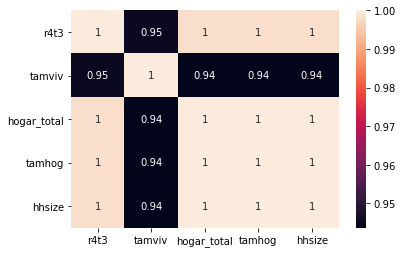

In [229]:
repeated_variables = ['r4t3', 'tamviv', 'hogar_total', 'tamhog', 'hhsize']
sns.heatmap(train[repeated_variables].corr(), annot=True)

- Out of r4t3, tamviv and hogar_total, we will keep tamviv as the other two variables are perfectly correlated with tamhog and hhsize
- Between tamhog and hhsize, we can choose either as both of them have the same correlation with other variables. I will keep hhsize.

In [230]:
train_data.drop(columns=['r4t3', 'hogar_total', 'tamhog'], inplace=True, axis=1)
test_data.drop(columns=['r4t3', 'hogar_total', 'tamhog'], inplace=True, axis=1)

##### Zero Variance columns

In [231]:
numeric_col = list(train_data.select_dtypes(exclude=['object']).columns)
col_var_0 = [col for col in numeric_col if train[col].var() == 0]
col_var_0

['elimbasu5']

In [232]:
train_data.drop(columns=col_var_0, inplace=True, axis=1)
test_data.drop(columns=col_var_0, inplace=True, axis=1)

## Train test split

Since our test data does not contain the Target column, we need to split our training data into train and test sets in order to check the accuracy of our model. Once we train the model, we will fit it to our original test set i.e., the one without Target column

In [233]:
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model building

In [237]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0, n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [238]:
y_pred = classifier.predict(X_test)

Confusion Matrix plot:


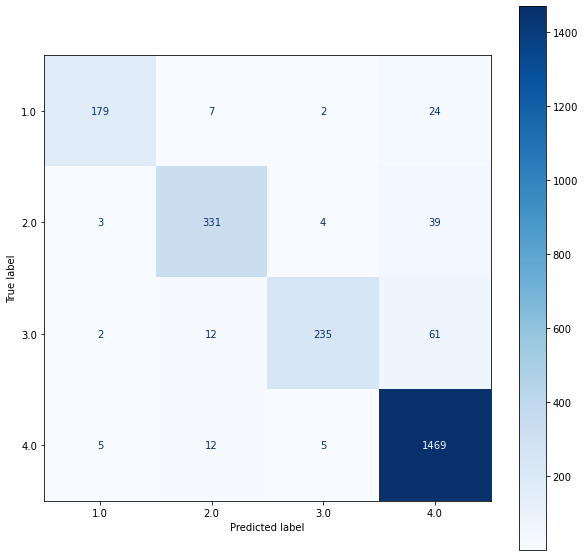

Confusion Matrix :
[[ 179    7    2   24]
 [   3  331    4   39]
 [   2   12  235   61]
 [   5   12    5 1469]]


              precision    recall  f1-score   support

         1.0       0.95      0.84      0.89       212
         2.0       0.91      0.88      0.90       377
         3.0       0.96      0.76      0.85       310
         4.0       0.92      0.99      0.95      1491

    accuracy                           0.93      2390
   macro avg       0.93      0.87      0.90      2390
weighted avg       0.93      0.93      0.92      2390



In [239]:
#Check model performance using confusion matrix and classification report.
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
print("Confusion Matrix plot:")
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

### Checking the accuracy using random forest with cross-validation

In [240]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.58 %
Standard Deviation: 1.26 %
